In [58]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import jovian

In [12]:
dataset = MNIST(root='data/', download=True, train=True, transform=transforms.ToTensor())

In [18]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


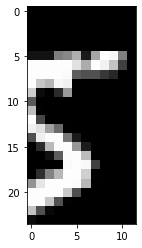

In [24]:
plt.imshow(img_tensor[0, 0:24, 13:25], cmap='gray') #needs 1st part as 0, channel not expected by imshow or is the last dimension

In [30]:
train_ds, val_ds = random_split(dataset, [50000, 10000])

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle=True)

In [62]:
input_size = 28*28
num_classes = 10

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, input_size)
        out = self.linear(xb)
        return out
        
model = MnistModel()

In [63]:
print(model.linear.weight.shape)

torch.Size([10, 784])


In [54]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0308, -0.0111,  0.0040,  ...,  0.0267,  0.0132, -0.0233],
         [-0.0331,  0.0174, -0.0255,  ...,  0.0240,  0.0200,  0.0197],
         [-0.0204, -0.0122,  0.0124,  ..., -0.0009,  0.0269,  0.0105],
         ...,
         [-0.0005,  0.0133, -0.0094,  ...,  0.0354, -0.0197, -0.0042],
         [ 0.0021, -0.0143,  0.0274,  ..., -0.0078,  0.0333, -0.0114],
         [ 0.0331,  0.0259, -0.0177,  ...,  0.0014,  0.0046, -0.0152]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0099,  0.0308, -0.0198, -0.0148, -0.0121,  0.0187,  0.0196, -0.0059,
         -0.0299, -0.0262], requires_grad=True)]

In [57]:
for images, labels in train_loader:
    output = model(images)
    break
print(output.shape)
print(output.data[:2])

torch.Size([128, 10])
tensor([[ 0.0171,  0.1279,  0.5296, -0.0292, -0.1073, -0.3569,  0.1090, -0.2533,
         -0.2373, -0.0572],
        [ 0.0077,  0.0283,  0.0157, -0.2974, -0.1352,  0.0815, -0.1028, -0.0849,
          0.0180,  0.2391]])


In [65]:
jovian.commit(filename='logistic_regression.ipynb',  project='pytorch_learn', git_commit=True, git_message='writing forward pass')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nempickaxe/pytorch-learn" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Committed successfully! https://jovian.ml/nempickaxe/pytorch-learn


'https://jovian.ml/nempickaxe/pytorch-learn'